In [1]:
import pickle
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
import time

In [2]:
# 6.1
n_samples, n_features = 100, 5000000
rng = np.random.RandomState(2022)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [3]:
tic = time.time()
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print("Ridge regression time:", time.time() - tic)

Ridge regression time: 3.6409971714019775


In [4]:
tic = time.time()
kridge = KernelRidge(alpha=1.0)
kridge.fit(X, y)
time.time() - tic
print("Kernel ridge regression time:", time.time() - tic)

Kernel ridge regression time: 2.056908130645752


In [5]:
# 6.2
n_samples, n_features = 1000, 500
rng = np.random.RandomState(2022)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [6]:
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)
print("Number of features used in ridge:", np.count_nonzero(ridge.coef_))

Number of features used in ridge: 500


In [7]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print("Number of features used in ridge:", np.count_nonzero(lasso.coef_))

Number of features used in ridge: 2


In [8]:
ridge = Ridge(alpha=1000)
ridge.fit(X, y)
print("Number of features used in ridge:", np.count_nonzero(ridge.coef_))

Number of features used in ridge: 500


In [9]:
# 6.3
coef = []
for alpha in np.flip(np.arange(0.01, 0.2, 0.01)):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coef.append(lasso.coef_)

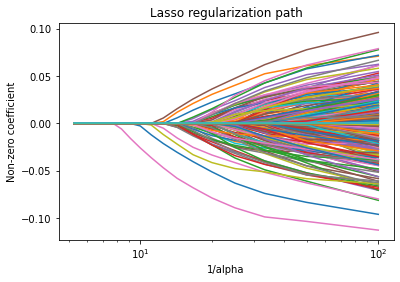

In [10]:
plt.figure()
plt.xlabel('1/alpha')
plt.ylabel('Non-zero coefficient')
for i in range(500):
    plt.plot( np.flip(1/ np.arange(0.01, 0.2, 0.01)), np.array(coef)[:, i])
plt.title('Lasso regularization path')
plt.xscale('log')
plt.savefig("regpath_lasso.png")
plt.show()

In [11]:
coef = []
for alpha in np.flip(np.arange(0.01, 0.2, 0.01)):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coef.append(ridge.coef_)

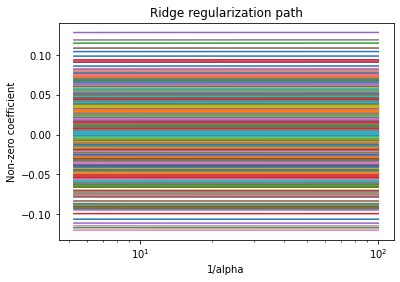

In [12]:
   
plt.figure()
plt.xlabel('1/alpha')
plt.ylabel('Non-zero coefficient')
for i in range(500):
    plt.plot( np.flip(1/ np.arange(0.01, 0.2, 0.01)),np.array(coef)[:, i])
plt.title('Ridge regularization path')
plt.xscale('log')
plt.savefig("regpath_rige.png")
plt.show()